# Optimisation for Data Science: HomeWork
# Student ID:  1178077




The dataset consist of 14 patient attributes such as gender, age, smoking habits,heartrate etc with a final diagnosis 'target condition' of the presence of heart disease or otherwise.

The aim of the use of the dataset is show how the 14 listed attributes can estimate the 10-year risk of developing coronary heart disease (TenyearCHD). The response variable 'TenYearCHD' column contains binary value of '1' which indicates the presence of heart disease in the patient and '0', if other-wise

The Logistic regression model can be used in this case of the data to essentially try to find the best weights to predict the response variable.

We will use the Regularised Logistic Regression equation from the lectures..

$$  \min    h_w \left(x\right)= g(w^ \top x^{i}) =\sum \limits_{i =1}^{m}log( 1 + exp(-y^{i}w^ \top x^{i})) + \frac {\lambda} {2} \|w\|^2 $$

and the gradient formular: 

$$ \bigtriangledown h_w \left(x\right) = - \sum \limits_{i =1}^{m} y^{i}x^{i}( 1 - g(y^{i}w^ \top x^{i}) + \lambda w $$


with GD weight update formular;

$$ w_j = w_j - \alpha \frac {\delta}{\delta w_j}h_w \left(x\right)  $$


with SGD weight update formular;

$$ w_j = w_j - \alpha \frac {\delta}{\delta w_j}h_w (\tilde{x})  $$


with SVRG weight update formular;

$$ w_j = w_j - \alpha_j \left[ \triangledown h_{ij}( w_j) - \triangledown h_{ij}( \tilde{w}) + \frac {1}{m} \sum \triangledown h_{i}( \tilde{w}) \right]$$




In [1]:
#initialising python libraries

import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from matplotlib import pyplot as plt

In [2]:
#Importing and pre-processing data

raw_data = pd.read_csv("/Users/rowenabernard/Downloads/framingham_heart_disease.csv")
data_ = raw_data.dropna(axis=0)
data_ = data_.drop(['education'], axis = 1)
y = data_['TenYearCHD']
x = data_.drop(['TenYearCHD'], axis = 1)
x = preprocessing.StandardScaler().fit(x).transform(x)  #scaling (normalising) the values as some attributes have very high values
x = pd.DataFrame(x)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 1) #splitting into a test and training sets

In [3]:
#Data Sample
raw_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
def sigmoid(x, w):
    """ 
    This returns the sigmoid value of the features 'x' and weights 'w'
    """
    z = np.dot(x, w)
    return 1 / (1 + np.exp(-z))

def cost_func(x, y, w, lam):
    """
    cost function for the logistic regression problem
    """
    a = y * np.dot(x, w)
    reg_term = (lam/2)*  np.dot(w,w)
    #b = sigmoid(np.dot(y, a))
    #b = (lam/2) * np.square(w)
    return np.sum(np.log(1 + np.exp(a))) + reg_term


def grad_(x,y,w,lam):
    """
    returns the gradient given the training sets
    x = features
    y = target variable
    w = weights
    lam = lamda value for regularisation term
    
    """
    a = np.dot(x.T, y)
    b= 1 - sigmoid(a , w.T)
    reg_term = (lam) * w
    d = np.dot(a, b)
    grad = - d  + reg_term
    return grad


def update_weight(w, learning_rate, gradient):
    """
    updates weights at each gradient descent iteration
    w = weight at iteration i
    learning_rate
    gradient = gradient calculated at iteration i
    """
    return w - learning_rate * gradient


def batch_(x, y, batch_size):
    """
    returns random set or sets(in case of mini batches)
    """
    if batch_size == 1:
        batch = random.randint(sorted(x.index)[0], sorted(x.index)[1])
    else:
        batch = random.sample(range(sorted(x.index)[0],sorted(x.index)[-1]) , batch_size)
        
    yield(x.loc[batch], y.loc[batch])


# Gradient Descent

In [14]:

#Gradient Descent

start_time = time.time()  #intitate cpu time 
#intialising the various parameters 
num_iter = 10000           #number of iterations
m, n = train_x.shape  
w = np.zeros(n)            #initial weights 
lam = 0.1                  #lambda value for regularisation
alpha =0.01                # Learning rate for the gradient descent $$ \alpha $$ 


for i in range(num_iter):
    grad = grad_(train_x, train_y, w, lam)
    w = update_weight(w, alpha, grad)

end_time = time.time()                         #end of iteration 
GD_cpu_time = end_time - start_time            #calculate total cpu time take



predicted = sigmoid(test_x, w)    #Using learned weights to predict previously unseen test_data

y_pred = [1 if x > 0.5 else 0 for x in predicted] #converting to binary values

GD_accuracy = round(accuracy_score(test_y, y_pred)*100, 2) #Computing accuracy score for predictions using learned weights

print('Gradient Descent Accuracy', GD_accuracy)
print('GD_CPU time', GD_cpu_time)



Gradient Descent Accuracy 61.08
GD_CPU time 4.2751171588897705


# Stochastic Gradient Descent

In [6]:

#Stochastic Gradient Descent (SGD)

SGD_start_time = time.time()  #intitate cpu time 

#intialising the various parameters 
num_iter = 10000           #number of iterations
m, n = train_x.shape  
SGD_w  = np.zeros(n)        #initial weights 
lam = 0.1                  #lambda value for regularisation
alpha =0.01                # Learning rate for the gradient descent $$ \alpha $$ 
batch_size = 1             #batchsize 


for i in range(num_iter):
    for (x_batch, y_batch) in batch_(train_x, train_y, batch_size): 
            grad = grad_(x_batch, y_batch, SGD_w , lam)
            SGD_w = update_weight(SGD_w , alpha, grad)

SGD_end_time = time.time()                      #end of iteration 
SGD_cpu_time = SGD_end_time - SGD_start_time    #calculate total cpu time take


SGD_predicted = sigmoid(test_x, SGD_w )    #Using learned weights to predict previously unseen test_data

SGD_y_pred = [1 if x > 0.5 else 0 for x in SGD_predicted] #converting to binary values

SGD_accuracy = round(accuracy_score(test_y, SGD_y_pred)*100, 2) #Computing accuracy score for predictions using learned weights

print('Gradient Descent Accuracy', SGD_accuracy)
print('\n CPU time', SGD_cpu_time)


Gradient Descent Accuracy 85.87

 CPU time 16.856958866119385


# SVRG 

weight update 
$$ w_j = w_j - \alpha_j \left[ \triangledown h_{ij}( w_j) - \triangledown h_{ij}( \tilde{w}) + \frac {1}{m} \sum \triangledown h_{i}( \tilde{w}) \right]$$


In [54]:
#intialising the various parameters

SVRG_start_time = time.time()  #intitate cpu time 
num_iter = 10000           #number of iterations
m, n = train_x.shape  
SVRG_w  = np.zeros(n)      #initial weights 
lam = 0.1                  #lambda value for regularisation
alpha =0.01                # Learning rate for the gradient descent $$ \alpha $$ 
batch_size = 1             #batchsize 

w_iter = []

w_iter_last = SVRG_w 


#weight update
for i in range(num_iter):
    w_hat = w_iter_last
    
    w = grad_(train_x, train_y, w_hat, lam)

    for k in range(len(w)):
    
        f_1 = grad_(train_x, train_y, w[k], lam  )
        
        f_2 = grad_(train_x, train_y, w_hat[k], lam  )
        
        f_3 = (1/m) * np.sum( grad_(train_x, train_y, w_hat, lam  ))
        
        w = w - alpha * (f_1 - f_2 + f_3)
        
    w_iter_last = w 
    
    
SVRG_end_time = time.time()                      #end of iteration 
SVRG_cpu_time = SVRG_end_time - SVRG_start_time    #calculate total cpu time take
    
SVRG_predicted = sigmoid(test_x, w_iter_last )    #Using learned weights to predict previously unseen test_data

SVRG_y_pred = [1 if x > 0.5 else 0 for x in SVRG_predicted] #converting to binary values

SVRG_accuracy = round(accuracy_score(test_y, SVRG_y_pred)*100, 2) #Computing accuracy score for predictions using learned weights

print('SVRG Accuracy', SVRG_accuracy)

print('\n CPU time', SVRG_cpu_time)



/Users/rowenabernard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


SVRG Accuracy 39.02

 CPU time 179.6473879814148


# Plot of Accuracy vs CPU_time

We can compare CPU time and Accuracy for the logistic problem using both Gradient and a Stochastic gradient descent methods to minimise the objective function

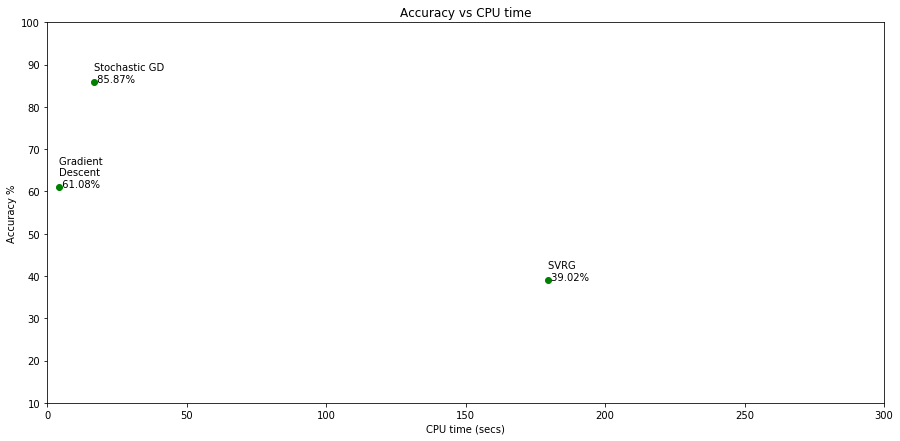

In [55]:
#plt.plot( GD_cpu_time, GD_accuracy, 'go-', label='GD');
plt.figure(figsize=(15, 7));
plt.title('Accuracy vs CPU time');
plt.ylabel('Accuracy %');
plt.xlabel('CPU time (secs)');

plt.xlim( (0, 300) );
plt.ylim( (10, 100) );

plt.plot( [GD_cpu_time, SGD_cpu_time, SVRG_cpu_time],[GD_accuracy,SGD_accuracy, SVRG_accuracy], 'go',label='SGD');
plt.text(x = GD_cpu_time, y= GD_accuracy, s='Gradient \nDescent \n {}%'.format(GD_accuracy));
plt.text(x = SGD_cpu_time, y= SGD_accuracy, s='Stochastic GD \n {}%'.format(SGD_accuracy));
plt.text(x = SVRG_cpu_time, y= SVRG_accuracy, s='SVRG \n {}%'.format(SVRG_accuracy));